In [2]:
import pm4py
import pandas as pd

log = pm4py.read_xes('Sepsis Cases - Event Log.xes')

dataframe = pm4py.convert_to_dataframe(log)
first_40_lines = dataframe.head(40)
first_40_lines.to_csv('Sepsis Cases - Event Log - 40 lines.csv')
dataframe.to_csv('Sepsis Cases - Event Log.csv')

c:\Users\Lenovo\anaconda3\envs\dm\lib\site-packages\pm4py\util\dt_parsing\parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\dm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1117.03it/s]


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Sepsis Cases - Event Log.csv')

# Group by 'case_id' and concatenate the events for each trace
trace_df = df.groupby('case:concept:name')['org:group'].apply(lambda x: ','.join(x)).reset_index()

# Count the occurrences of each unique trace
trace_counts = trace_df['org:group'].value_counts()

# Rename the column for display purposes
trace_counts = trace_counts.rename_axis('Trace').reset_index(name='Count')

# Print the results without the index
print(trace_counts.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                            Trace  Count
                                                                                                                                                                                                                                                                                                                                                                        A,C,A,B,B     46
                                                                                                                                                                                                                                                      

In [4]:
df

,Unnamed: 0,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case:concept:name,Leucocytes,CRP,LacticAcid
0,0,True,A,True,True,True,True,True,True,True,...,True,complete,A,False,True,True,A,NaN,NaN,NaN
1,1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN
2,2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN
3,3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2
4,4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,15209,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,KNA,NaN,66.0,NaN
15210,15210,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,KNA,NaN,NaN,NaN
15211,15211,False,L,False,False,False,False,False,False,False,...,False,complete,NaN,False,False,False,LNA,NaN,NaN,NaN
15212,15212,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,LNA,NaN,NaN,NaN


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Sepsis Cases - Event Log.csv')

# Group by 'Case ID' and concatenate the events for each trace
trace_df = df.groupby('case:concept:name')['org:group'].apply(lambda x: ','.join(x)).reset_index()

# Count the occurrences of each unique trace
trace_counts = trace_df['org:group'].value_counts()

# Rename the column for display purposes
trace_counts = trace_counts.rename_axis('Trace').reset_index(name='Count')


# Print the results without the index, ensuring left-to-right display
print(trace_counts.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                            Trace  Count
                                                                                                                                                                                                                                                                                                                                                                        A,C,A,B,B     46
                                                                                                                                                                                                                                                      

In [6]:
# Drop rows from line 36 to the end
df = df.iloc[:534]
# Group by 'case_id' and concatenate the events for each trace
trace_df = df.groupby('case:concept:name')['org:group'].apply(lambda x: ','.join(x)).reset_index()

# Count the occurrences of each unique trace
trace_counts = trace_df['org:group'].value_counts()

# Rename the column for display purposes
trace_counts = trace_counts.rename_axis('Trace').reset_index(name='Count')

# Print the results without the index
print(trace_counts.to_string(index=False))


                                      Trace  Count
                                      A,C,A      3
                                  A,C,A,B,B      2
                            A,C,A,A,B,B,B,A      2
      A,C,A,B,B,B,A,A,G,P,B,B,B,F,B,B,B,E,?      1
                A,C,A,B,B,B,A,A,S,B,B,B,B,E      1
                    A,C,A,B,B,B,O,A,A,B,B,E      1
                      A,C,A,A,B,B,B,A,I,E,?      1
                      A,C,A,A,A,B,B,B,B,B,B      1
                                A,C,A,B,B,B      1
                                      L,C,L      1
                A,C,A,A,B,B,B,A,D,B,B,B,B,E      1
A,B,B,B,C,A,A,A,D,B,B,B,B,B,B,B,B,B,B,B,B,E      1
              A,C,A,B,B,B,A,A,N,B,B,B,B,E,?      1
                        A,C,A,A,A,B,B,B,Q,E      1
                        A,C,A,B,B,O,B,B,B,E      1
                      A,C,A,B,H,B,B,B,B,B,E      1
                      A,C,A,B,B,B,A,A,I,B,E      1
  A,C,A,A,B,B,B,A,P,B,B,B,B,B,B,B,O,B,B,E,?      1
                      A,C,A,A,B

parsing log, completed traces :: 100%|██████████| 1050/1050 [00:01<00:00, 925.16it/s]


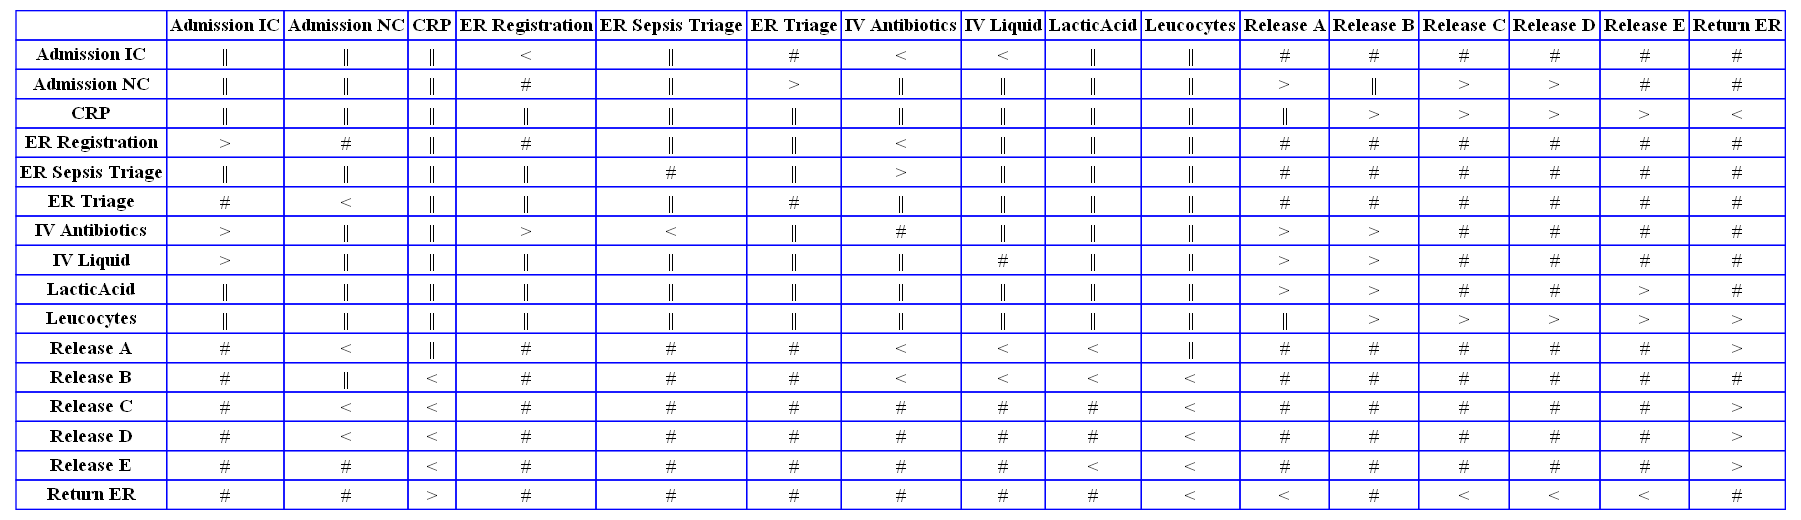

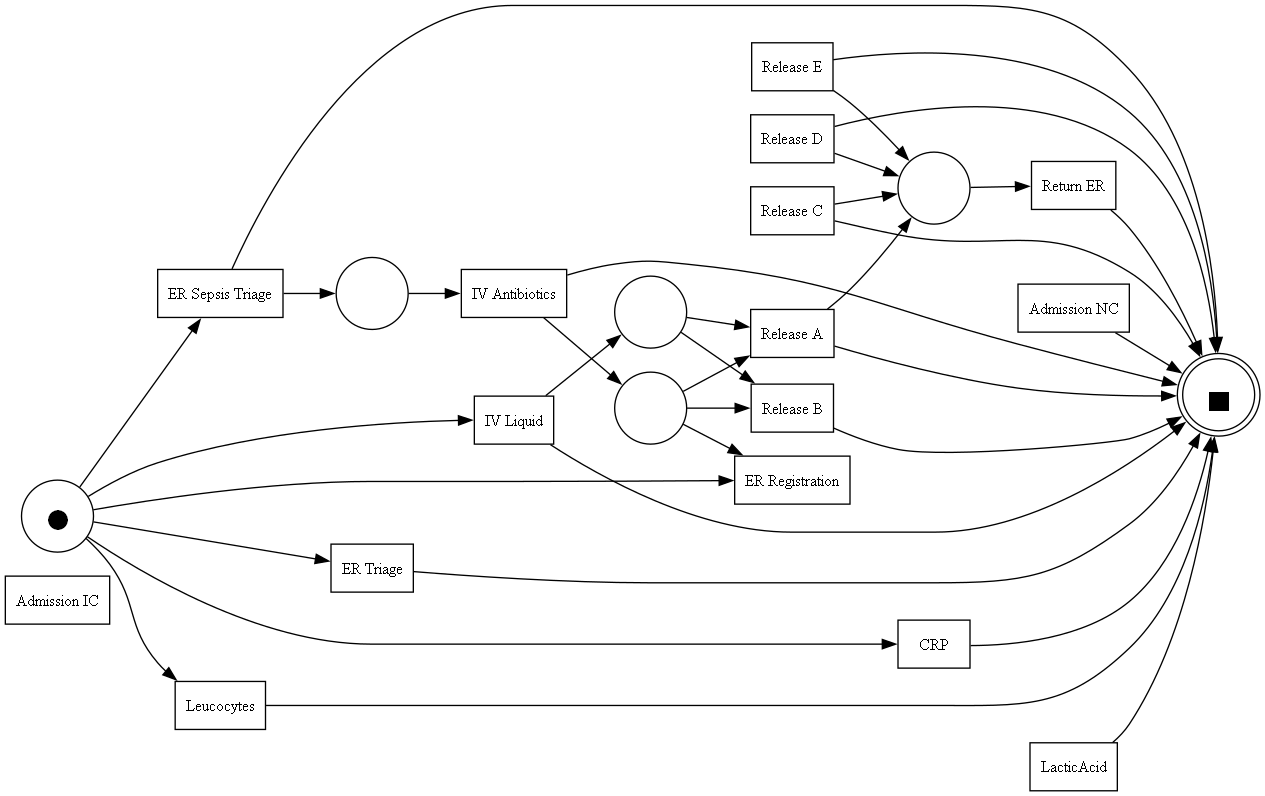

In [7]:
log_1 = pm4py.read_xes('Sepsis Cases - Event Log.xes')
footprints = pm4py.discover_footprints(log_1)
pm4py.view_footprints(footprints)
net, im, fm = pm4py.discover_petri_net_alpha(log_1)
pm4py.view_petri_net(net, im, fm)

parsing log, completed traces :: 100%|██████████| 1050/1050 [00:01<00:00, 913.23it/s]


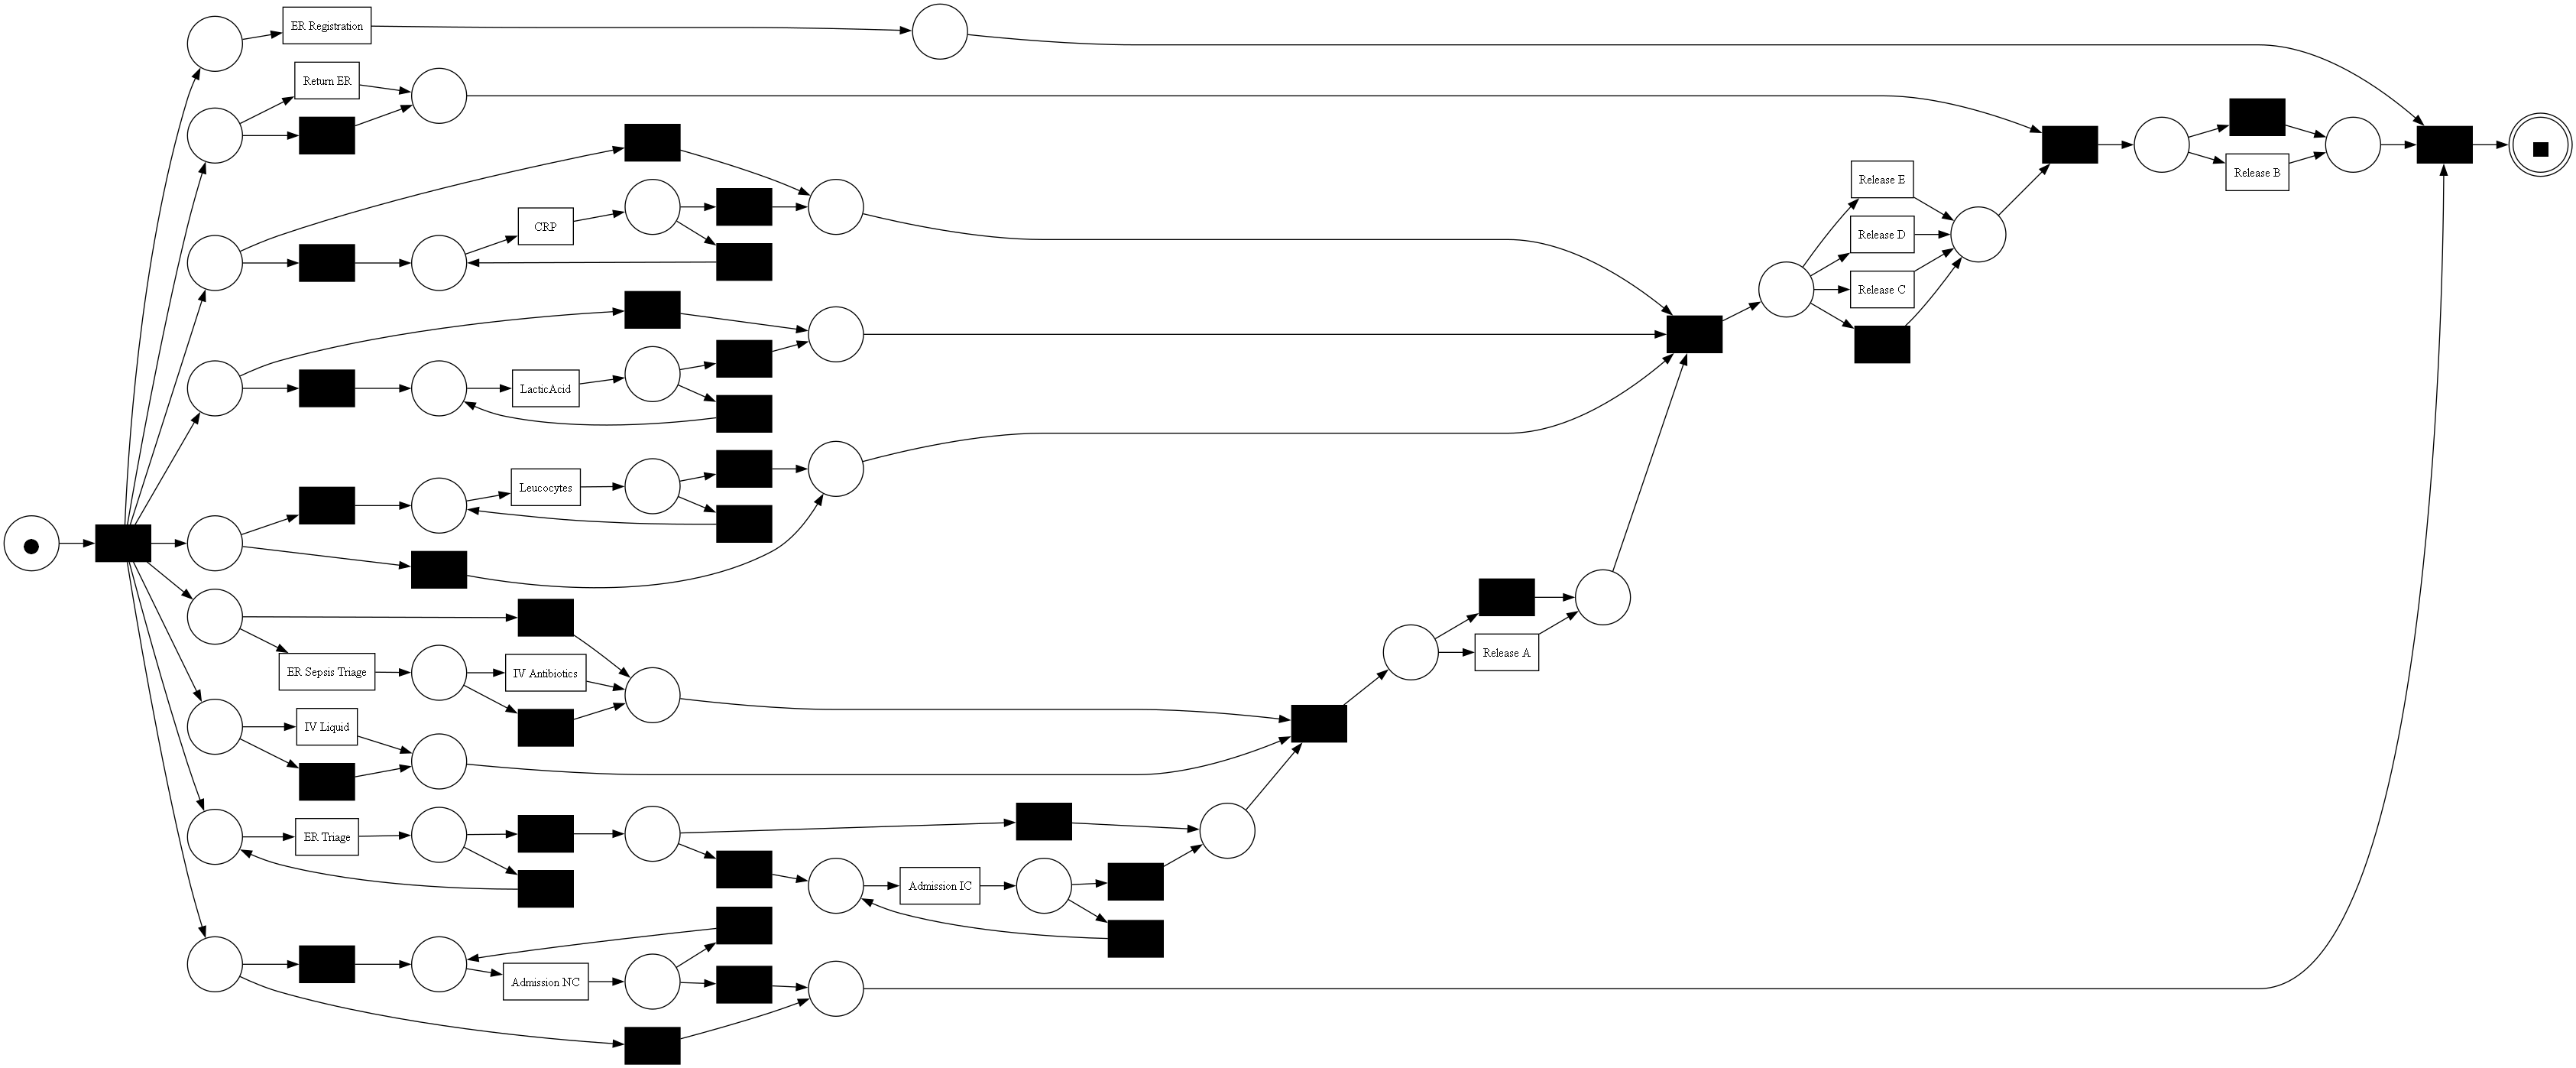

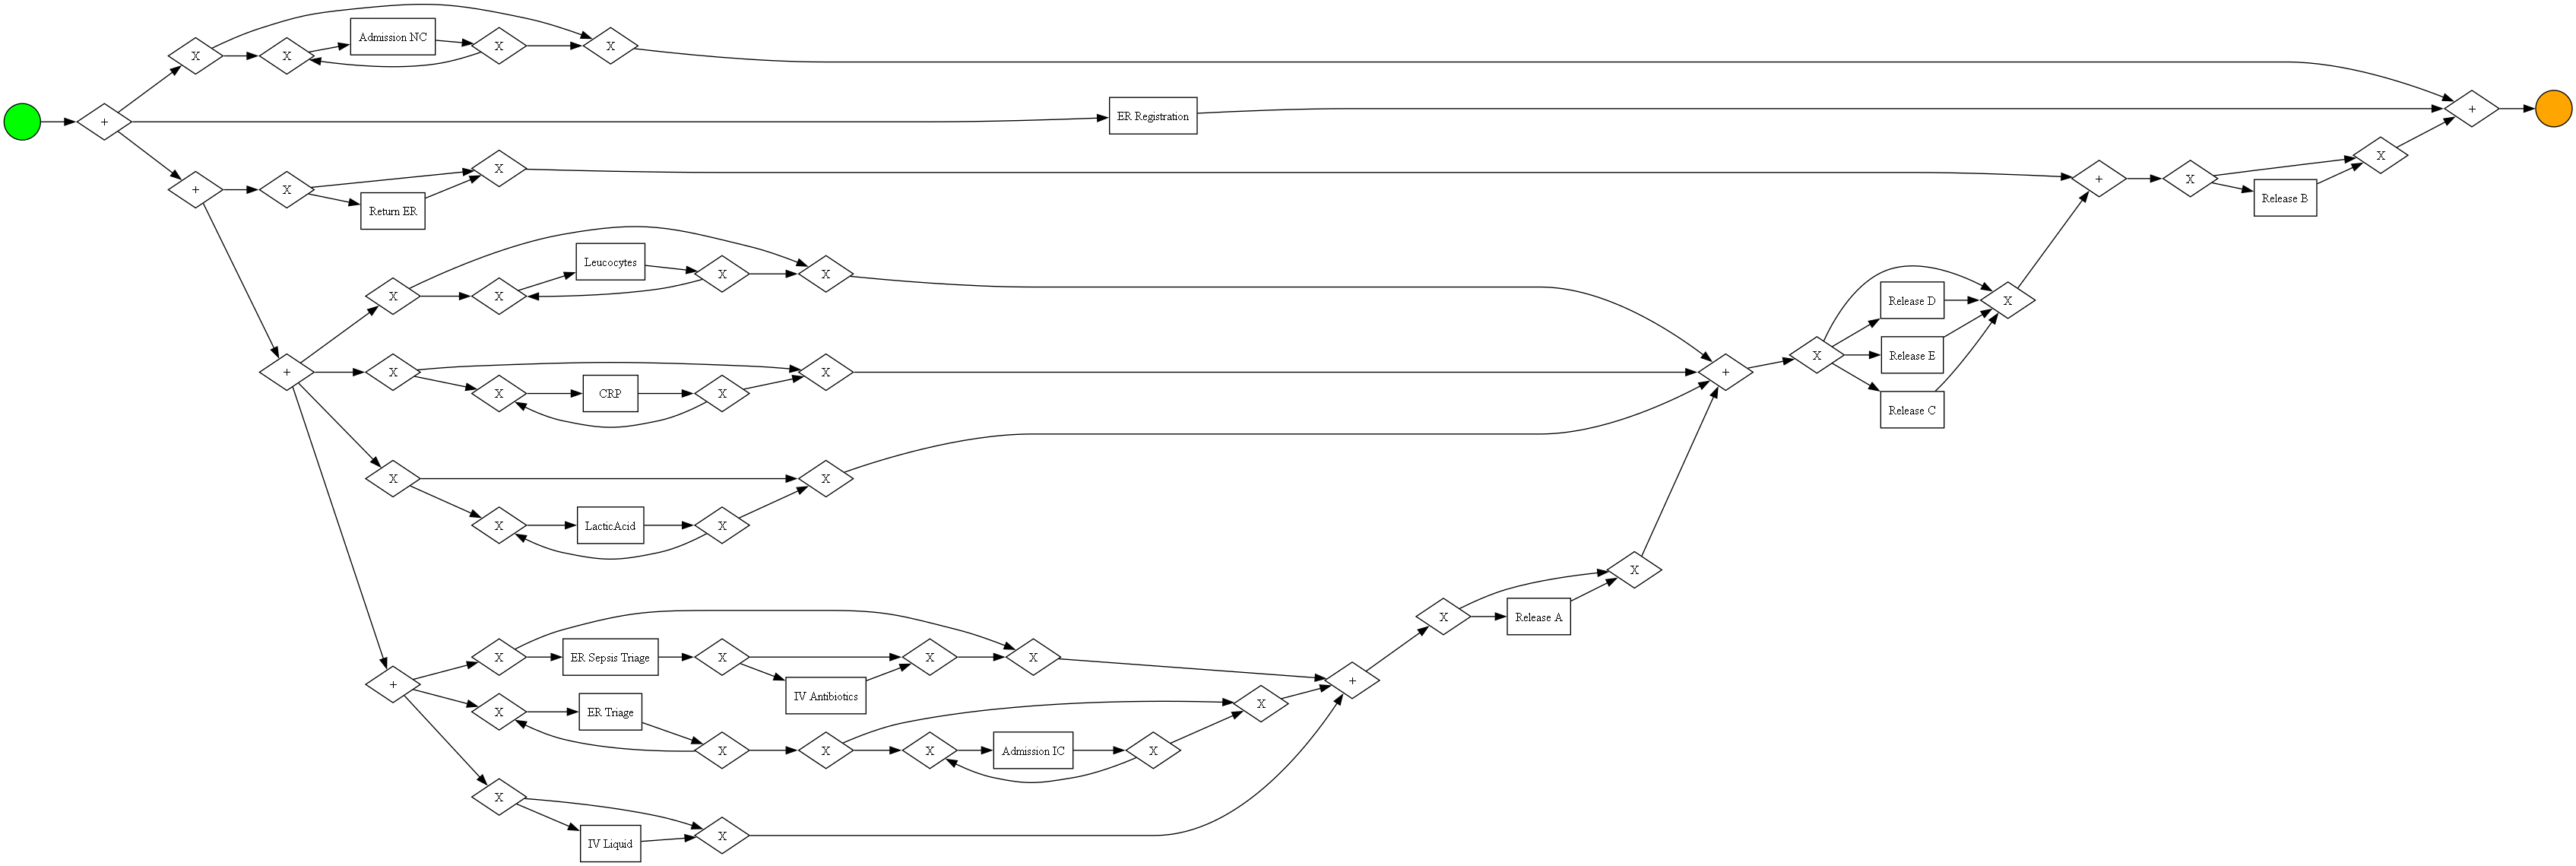

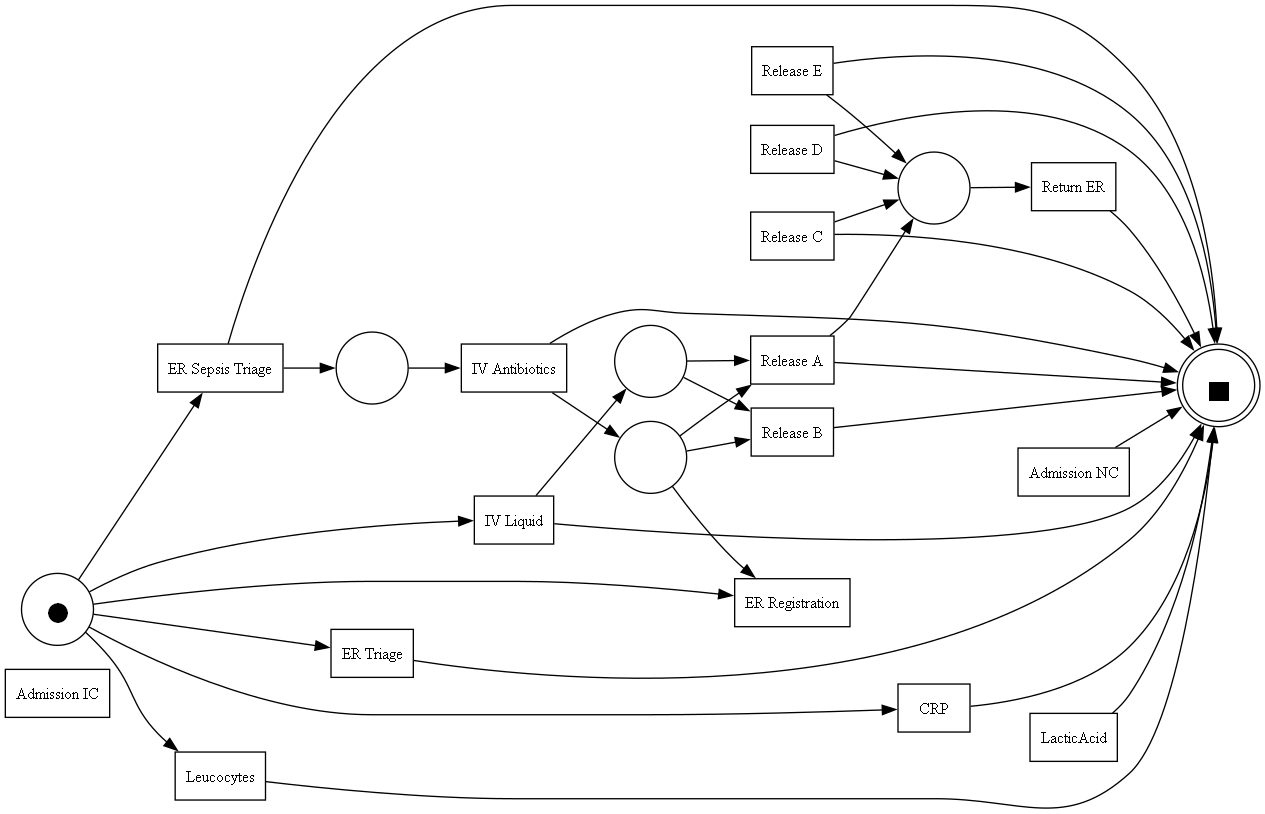

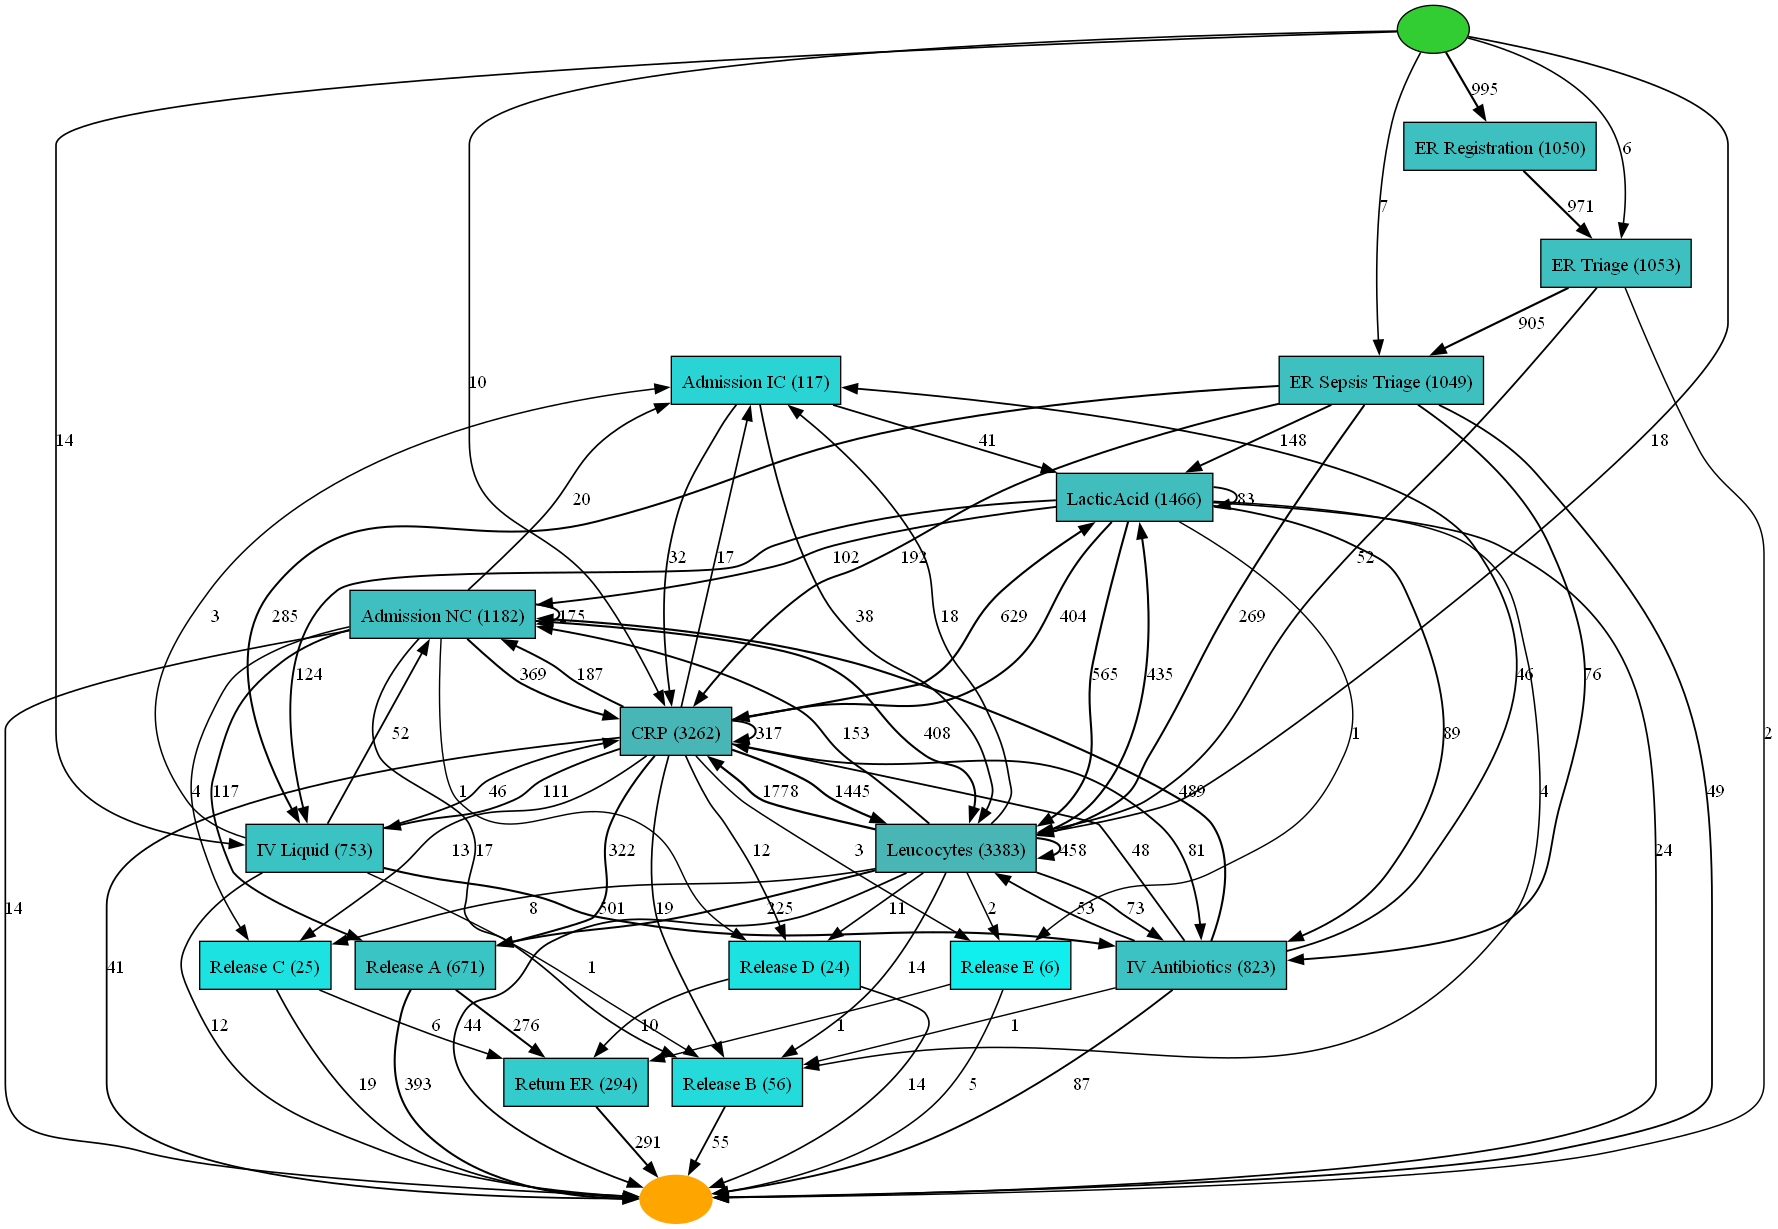

In [10]:
log_1 = pm4py.read_xes('Sepsis Cases - Event Log.xes')
net, im, fm = pm4py.discover_petri_net_inductive(log_1)
pm4py.view_petri_net(net, im, fm)
bpmn_graph = pm4py.discover_bpmn_inductive(log_1, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_bpmn(bpmn_graph)
net, im, fm = pm4py.discover_petri_net_alpha(log_1)
pm4py.view_petri_net(net, im, fm)
heu_net = pm4py.discover_heuristics_net(log_1, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_heuristics_net(heu_net, format='png')